In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Análise Exploratória de Dados sobre Acidentes nas Estradas Brasileiras**

## 1\. Contexto

<center>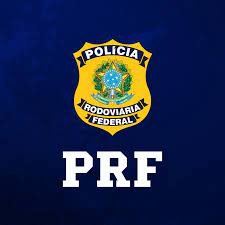</center>


## 2\. Pacotes e bibliotecas

In [ ]:
# Importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 3\. Exploração de Dados

### **3.1 Coleta de Dados**

In [ ]:
# Lendo o Arquivo csv
df_prf_2023 = pd.read_csv('/content/drive/MyDrive/PoDAcademy/Datasets/PRF/datatran2023.csv', delimiter=';', encoding='ISO-8859-1')

In [ ]:
# Primeiras 5 linhas

df_prf_2023.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [ ]:
# Quantidade de Linhas / Colunas

df_prf_2023.shape

(44035, 30)

### **3.2 Preparação dos Dados**

#### **3.2.1 Metadados**

In [ ]:
# Construindo função para obter metadados
def metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
# Obtendo metadados
metadados_prf = metadados(df_prf_2023)
metadados_prf.head(30)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,tracado_via,object,0,0.00,10
1,fase_dia,object,0,0.00,4
2,delegacia,object,422,0.96,146
3,regional,object,4,0.01,28
4,longitude,object,0,0.00,25887
5,latitude,object,0,0.00,25894
6,uso_solo,object,0,0.00,2
7,data_inversa,object,0,0.00,243
8,tipo_pista,object,0,0.00,3
9,condicao_metereologica,object,0,0.00,9


* A coluna `delegacia` possui 422 valores nulos, o que representa somente 0,96% de dados nulos. Os valores nulos vão ser substituidos por "Não preenchido", dado que é uma variável do tipo categórica.


* A variável `br` que representa as rodovias do Brasil é a unica variável do tipo float que possui valores nulos, esses valores vão ser substituidos por 0.

#### **3.2.2 Tratando Tipos incorretos de variáveis**

* Alterar o tipo das variáveis `longitude` e `latitude`
para float, pois essas variáveis irão ser utilizadas para gerar gráficos;

* Mudar o tipo da coluna `data_inversa`, de `object` para `datetime`.

In [ ]:
# Alterando para float
df_prf_2023['longitude'] = df_prf_2023['longitude'].str.replace(',', '.').astype(float)
df_prf_2023['latitude'] = df_prf_2023['latitude'].str.replace(',', '.').astype(float)

# Verificando alteração
df_prf_2023[['latitude', 'latitude']].dtypes

latitude    float64
latitude    float64
dtype: object

In [ ]:
# Alterando para datetime
df_prf_2023['data_inversa'] = pd.to_datetime(df_prf_2023['data_inversa'], format='%Y-%m-%d')

# Verificando alteração
df_prf_2023['data_inversa'].dtypes

dtype('<M8[ns]')

#### **3.2.3 Dados Faltantes**

In [ ]:
# Substituindo nulos das variáveis categóricas
var_categoricas = df_prf_2023.select_dtypes(include=['object']).columns
df_prf_2023[var_categoricas] = df_prf_2023[var_categoricas].fillna('Não Preenchido')

In [ ]:
# Substituindo nulos da variável numérica br por 0
df_prf_2023['br'].fillna(0, inplace=True)


In [ ]:
# Validando valores nulos
metadados_prf = metadados(df_prf_2023)
metadados_prf.head(30)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,tracado_via,object,0,0.0,10
1,fase_dia,object,0,0.0,4
2,delegacia,object,0,0.0,147
3,regional,object,0,0.0,29
4,longitude,object,0,0.0,25887
5,latitude,object,0,0.0,25894
6,uso_solo,object,0,0.0,2
7,data_inversa,object,0,0.0,243
8,tipo_pista,object,0,0.0,3
9,condicao_metereologica,object,0,0.0,9


## 4\. Análise Exploratória


### 4\.1 Distribuição de Variáveis Numéricas

In [ ]:
# Entendendo os dados numéricos
df_prf_2023.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,44035.000000,43927.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000,44035.000000
mean,521660.357761,210.470918,2.462019,0.084274,0.872352,0.277120,1.071693,0.156580,1.149472,1.670353,-19.006890,-46.579507
std,14223.260883,129.673471,2.198093,0.334204,1.072279,0.612197,1.810821,0.440062,1.182761,0.723926,7.687616,6.157540
min,496506.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-33.588291,-70.268638
25%,509444.500000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-25.260925,-50.419539
50%,521829.000000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-20.534590,-47.493420
75%,533955.500000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-12.904822,-42.596053
max,549361.000000,495.000000,73.000000,7.000000,61.000000,29.000000,61.000000,14.000000,62.000000,15.000000,4.383141,-34.828400


O código abaixo gera histogramas  para cada variável, dessa forma sendo possível compreender e analisar os dados de uma forma mais clara.

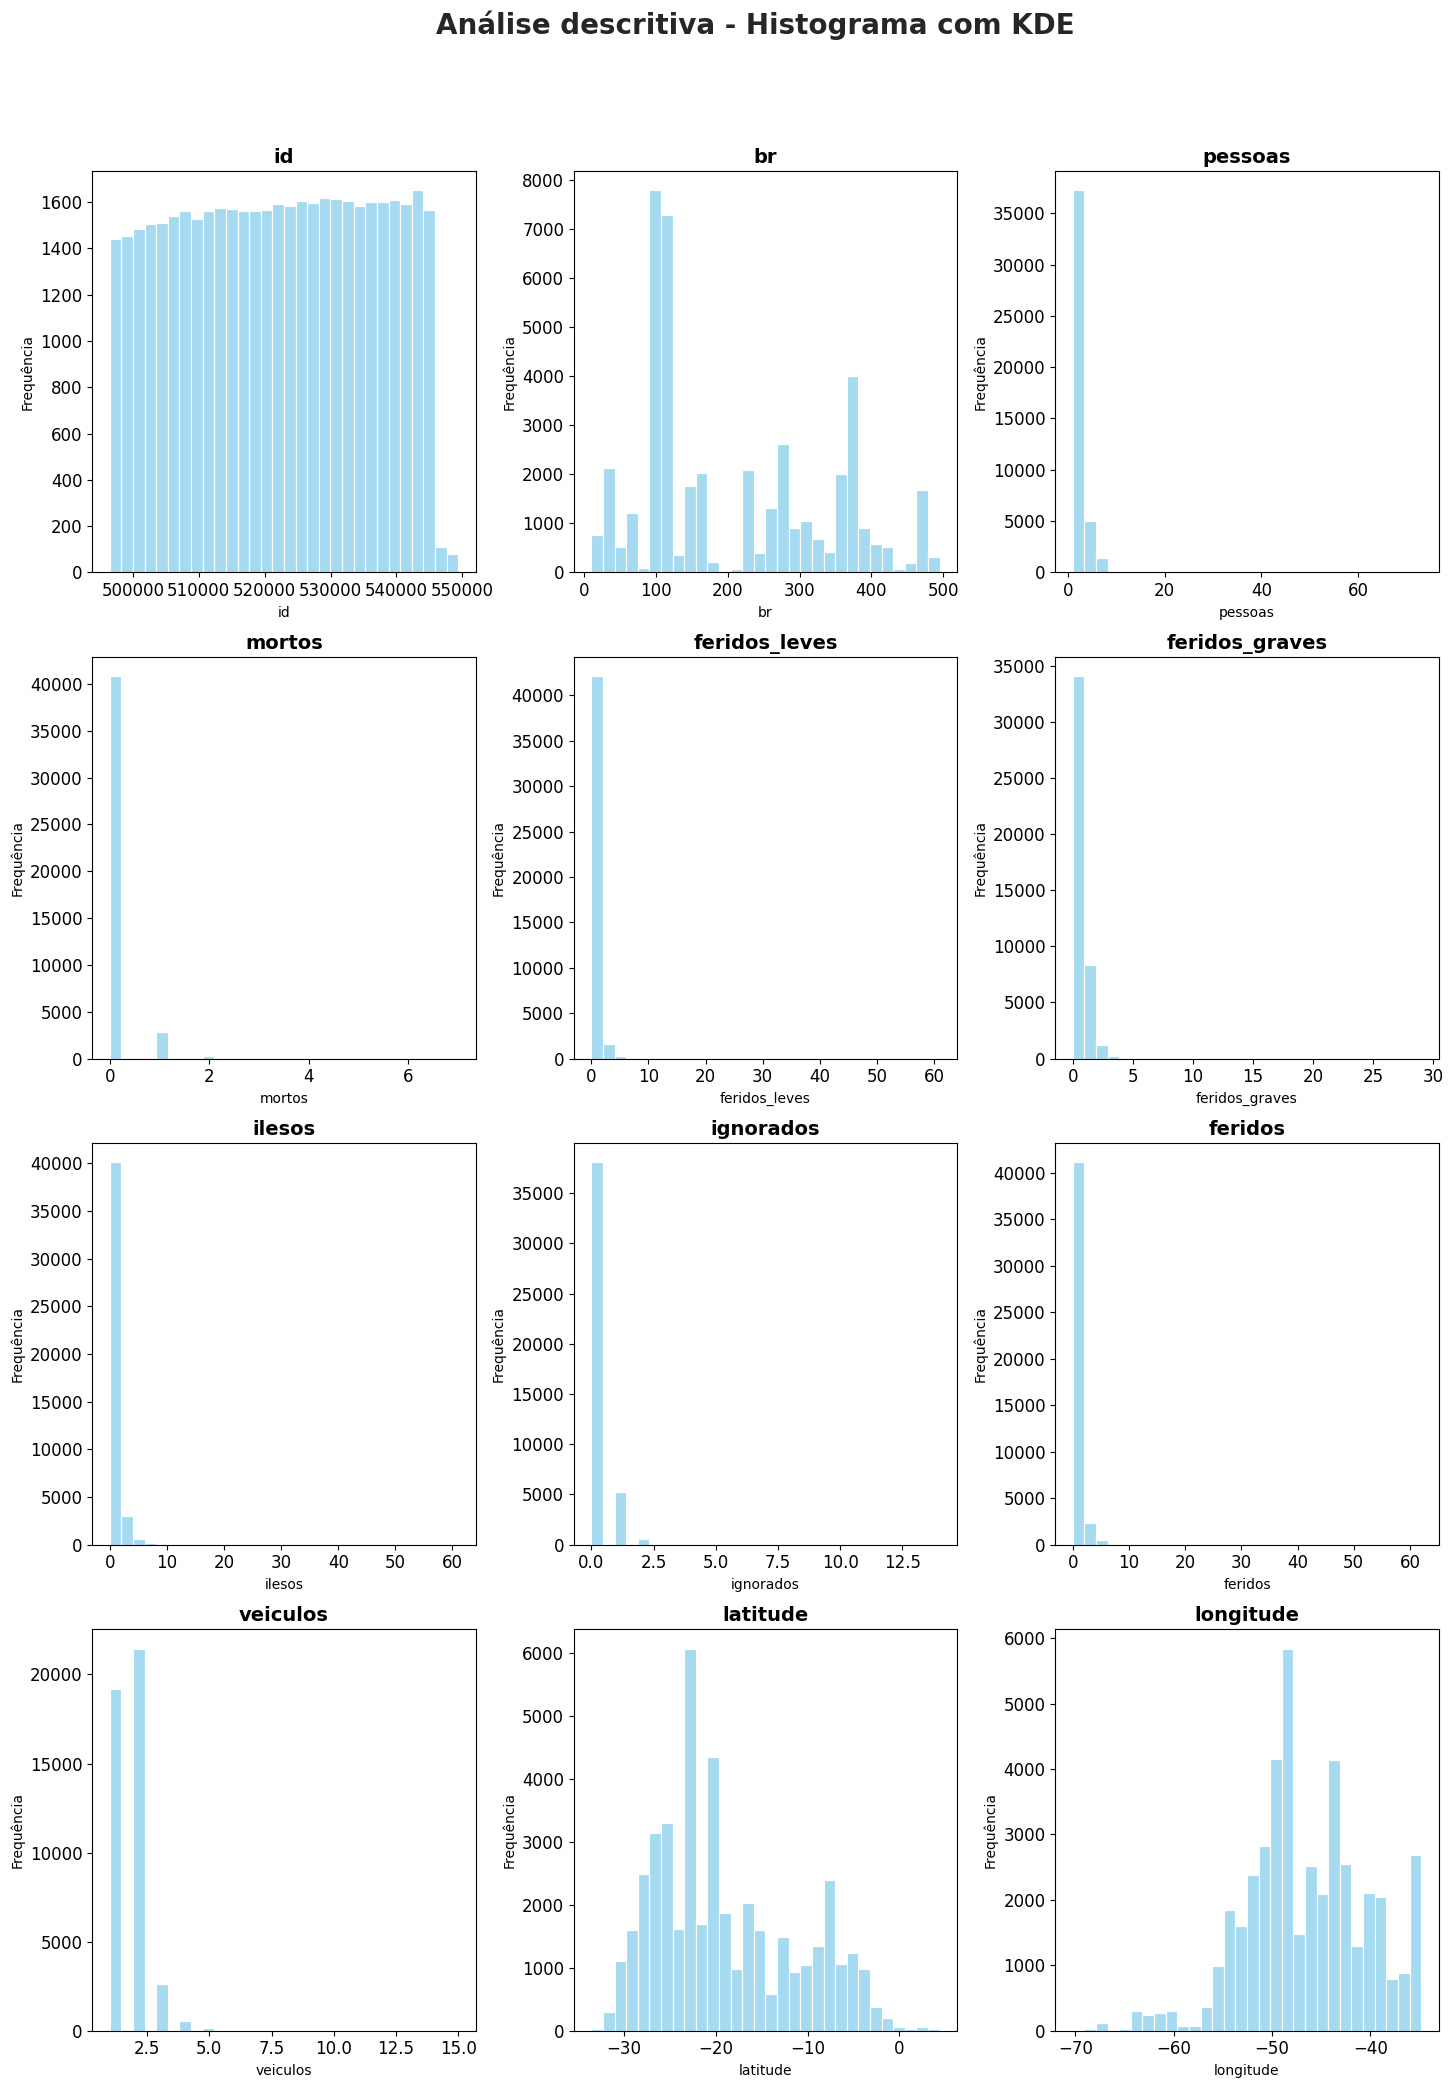

In [ ]:
def analise_var_num_hist(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=False)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
analise_var_num_hist(df_prf_2023)